In [ ]:
import os
os.chdir('/content/drive/MyDrive/DataScienceProject')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Packages.QC import QC
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
x_tr = pd.read_csv('Model ready data/x_train.csv')
x_tr_nm = pd.read_csv('Model ready data/x_train_norm.csv')
x_te = pd.read_csv('Model ready data/x_test.csv')
x_te_nm = pd.read_csv('Model ready data/x_test_norm.csv')
y_tr = pd.read_csv('Model ready data/y_train.csv')
y_te = pd.read_csv('Model ready data/y_test.csv')

In [ ]:
dt = DecisionTreeRegressor(random_state=10)
dt.fit(x_tr,y_tr)
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

##Grid search params

In [ ]:
dt_grid = GridSearchCV(dt,{'criterion':['squared_error','friedman_mse'],'max_depth':range(3,9),'max_features':['sqrt','log2']},cv=5,n_jobs=-1)
dt_grid.fit(x_tr,y_tr)
print(f'Best parameters are {dt_grid.best_params_} with best score of {dt_grid.best_score_}')

Best parameters are {'criterion': 'squared_error', 'max_depth': 7, 'max_features': 'sqrt'} with best score of 0.9644057200188911


In [ ]:
ydt_tr_pred = dt_grid.predict(x_tr)
ydt_te_pred = dt_grid.predict(x_te)
print(f'Mean squared error for best params:\nTraining = {mean_squared_error(y_tr,ydt_tr_pred)*100:.5f}%\tTesting = {mean_squared_error(y_te,ydt_te_pred)*100:.5f}%')
print(f'R-2 score:\nTraining = {r2_score(y_tr,ydt_tr_pred)*100:.5f}%\tTesting = {r2_score(y_te,ydt_te_pred)*100:.5f}%')
print(f'Adjusted R-2 score:\nTraining = {(1 - (1-r2_score(y_tr,ydt_tr_pred))*(len(y_tr)-1)/(len(y_tr)-x_tr.shape[1]-1))*100:.5f}%\tTesting = {(1 - (1-r2_score(y_te,ydt_te_pred))*(len(y_te)-1)/(len(y_te)-x_te.shape[1]-1))*100:.5f}%')

Mean squared error for best params:
Training = 0.29810%	Testing = 2.40019%
R-2 score:
Training = 99.60117%	Testing = 96.12417%
Adjusted R-2 score:
Training = 99.59296%	Testing = 95.78074%


##Manually set params

In [ ]:
dt_m = DecisionTreeRegressor(max_depth=4,random_state=10)
dt_m.fit(x_tr,y_tr)
ydtm_tr_pred = dt_m.predict(x_tr)
ydtm_te_pred = dt_m.predict(x_te)
print(f'Mean squared error for manual params:\nTraining = {mean_squared_error(y_tr,ydtm_tr_pred)*100:.5f}%\tTesting = {mean_squared_error(y_te,ydtm_te_pred)*100:.5f}%')
print(f'R-2 score:\nTraining = {r2_score(y_tr,ydtm_tr_pred)*100:.5f}%\tTesting = {r2_score(y_te,ydtm_te_pred)*100:.5f}%')
print(f'Adjusted R-2 score:\nTraining = {(1 - (1-r2_score(y_tr,ydtm_tr_pred))*(len(y_tr)-1)/(len(y_tr)-x_tr.shape[1]-1))*100:.5f}%\tTesting = {(1 - (1-r2_score(y_te,ydtm_te_pred))*(len(y_te)-1)/(len(y_te)-x_te.shape[1]-1))*100:.5}%')

Mean squared error for manual params:
Training = 0.84220%	Testing = 1.44189%
R-2 score:
Training = 98.87323%	Testing = 97.67163%
Adjusted R-2 score:
Training = 98.85003%	Testing = 97.465%


###Decision tree parameters from grid search seems to have overfit compared to manually selected parameters. Thus merely considering score on training set or test set alone to determine model performance is not advisable.

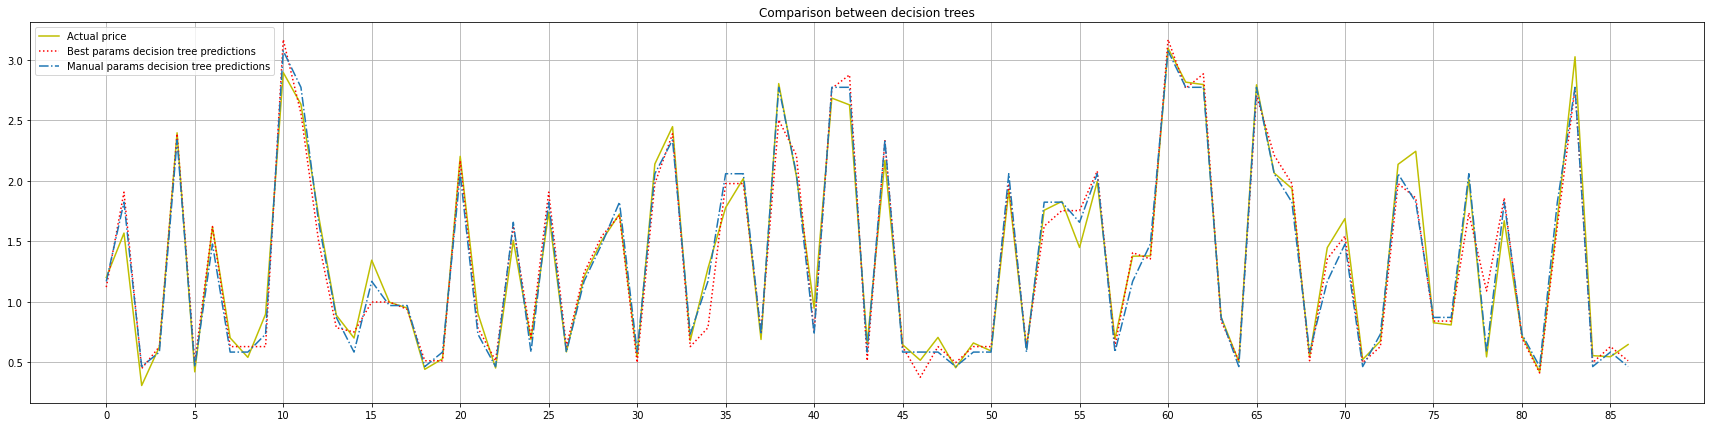

In [ ]:
ax = y_te.plot(color='y',figsize=(30,7))
plt.title('Comparison between decision trees')
pd.DataFrame(ydt_te_pred).plot(ls=':',color='r',ax=ax)
pd.DataFrame(ydtm_te_pred).plot(ls='-.',ax=ax,grid=True)
plt.xticks(np.arange(0,len(y_te)+1,5))
plt.legend(['Actual price','Best params decision tree predictions','Manual params decision tree predictions'])
plt.savefig('Results/Model outcomes/2A.Decision tree predictions on untransformed data.png')
plt.show() 

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

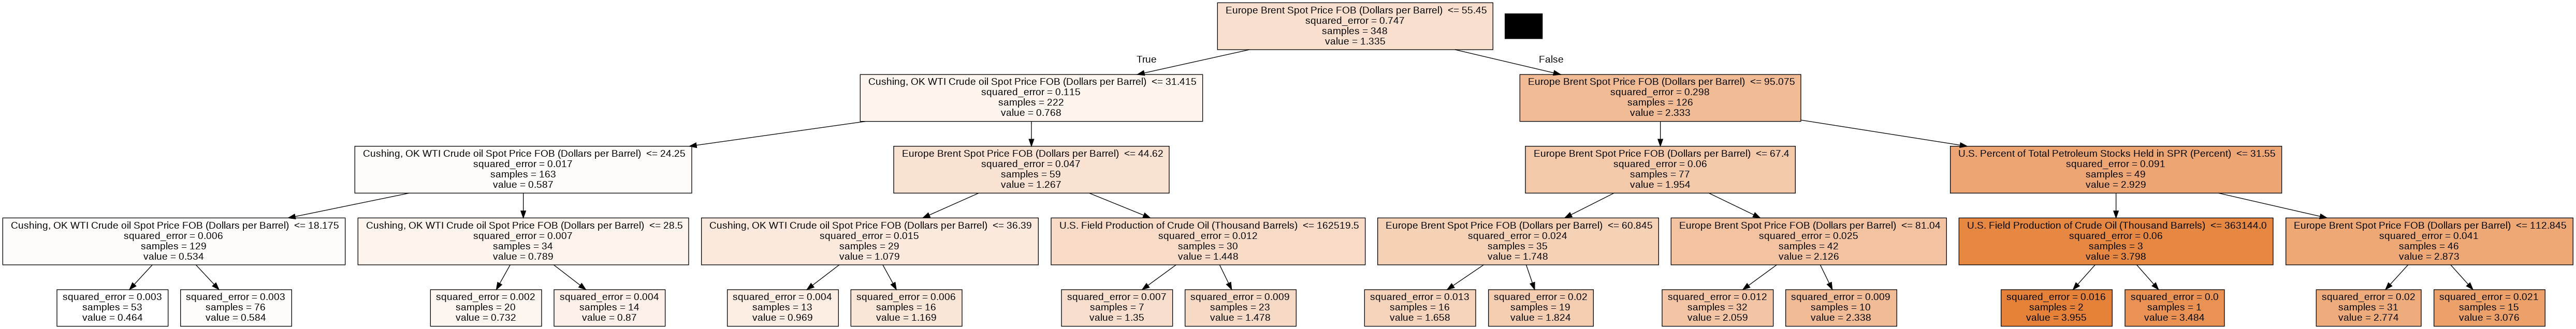

In [ ]:
dot_data = export_graphviz(dt_m,feature_names=x_tr.columns,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#Test on normalised data

In [ ]:
dt_n = DecisionTreeRegressor(max_depth=4,random_state=10)
dt_n.fit(x_tr_nm,y_tr)
ydtn_tr_pred = dt_n.predict(x_tr_nm)
ydtn_te_pred = dt_n.predict(x_te_nm)
print(f'Mean squared error for best params:\nTraining = {mean_squared_error(y_tr,ydtn_tr_pred)*100:.5f}%\tTesting = {mean_squared_error(y_te,ydtn_te_pred)*100:.5f}%')
print(f'R-2 score:\nTraining = {r2_score(y_tr,ydtn_tr_pred)*100:.5f}%\tTesting = {r2_score(y_te,ydtn_te_pred)*100:.5f}%')
print(f'Adjusted R-2 score:\nTraining = {(1 - (1-r2_score(y_tr,ydtn_tr_pred))*(len(y_tr)-1)/(len(y_tr)-x_tr.shape[1]-1))*100:.5f}%\tTesting = {(1 - (1-r2_score(y_te,ydtn_te_pred))*(len(y_te)-1)/(len(y_te)-x_te.shape[1]-1))*100:.5}%')

Mean squared error for best params:
Training = 0.84220%	Testing = 1.44189%
R-2 score:
Training = 98.87323%	Testing = 97.67163%
Adjusted R-2 score:
Training = 98.85003%	Testing = 97.465%


Almost similar outputs for not-normalized and normalized data

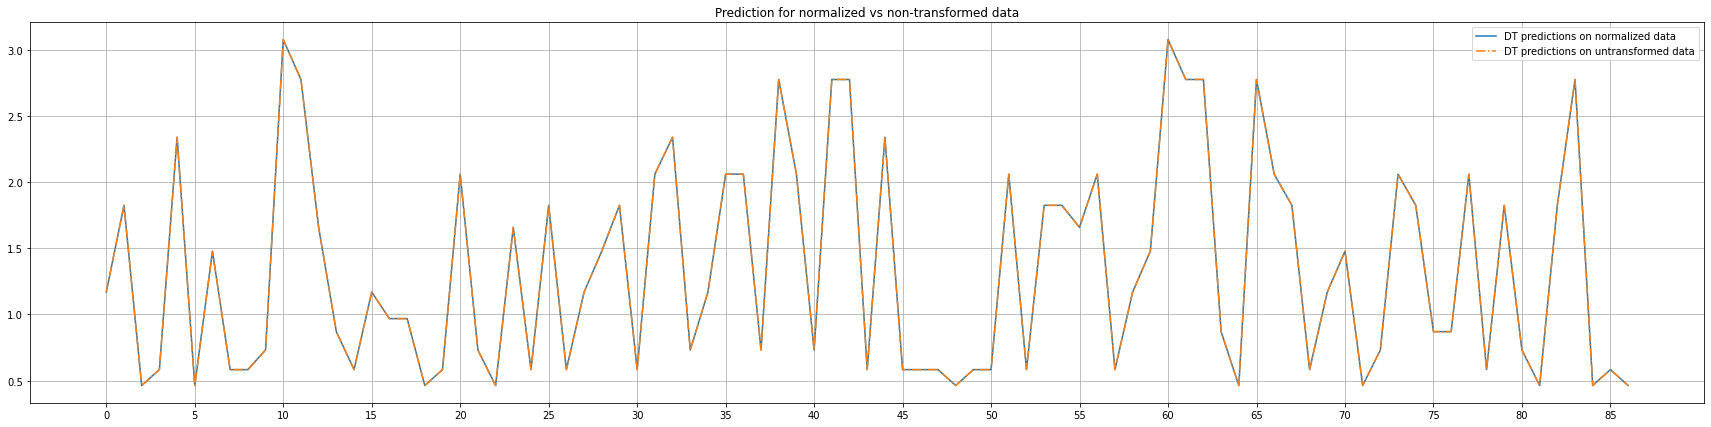

In [ ]:
ax = pd.DataFrame(ydtn_te_pred).plot(figsize=(30,7))
plt.title('Prediction for normalized vs non-transformed data')
pd.DataFrame(ydtm_te_pred).plot(ls='-.',ax=ax,grid=True)
plt.xticks(np.arange(0,len(y_te)+1,5))
plt.legend(['DT predictions on normalized data','DT predictions on untransformed data'])
plt.savefig('Results/Model outcomes/2B.Normalized vs untransformed data prediction.png')
plt.show() 